In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,MeanShift
from sklearn.datasets.samples_generator import make_blobs
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#读取工作簿和工作簿中的工作表
data_frame=pd.read_excel('Problem_C_Data_Wordle.xlsx')
# print(data_frame)
data = list(reversed(data_frame.loc[ 1: ,"Unnamed: 3"].tolist()))
data_1=list(reversed(data_frame.loc[ : ,"Percent in "]))[:-1]
data_2=list(reversed(data_frame.loc[ 1: ,"Unnamed: 7"].tolist()))
data_3=list(reversed(data_frame.loc[ 1: ,"Unnamed: 8"].tolist()))
data_4=list(reversed(data_frame.loc[ 1: ,"Unnamed: 9"].tolist()))
data_5=list(reversed(data_frame.loc[ 1: ,"Unnamed: 10"].tolist()))
data_6=list(reversed(data_frame.loc[ 1: ,"Unnamed: 11"].tolist()))
data_7=list(reversed(data_frame.loc[ 1: ,"Unnamed: 12"].tolist()))

In [39]:
# print(data)
word2idx={}
id2word={}
X=[]
cnt=0
for item in data:
    if(item not in word2idx.keys()):
        id2word[len(word2idx)]=item
        word2idx[item]=len(word2idx)
        
    X.append([data_1[cnt]/100,data_2[cnt]/100,data_3[cnt]/100,data_4[cnt]/100,data_5[cnt]/100,data_6[cnt]/100,data_7[cnt]/100])
    cnt+=1
X=np.array(X)    
print(X)

#print(train_X,letter2idx)

[[0.01 0.03 0.23 ... 0.24 0.09 0.01]
 [0.01 0.05 0.23 ... 0.24 0.14 0.02]
 [0.01 0.03 0.13 ... 0.3  0.22 0.04]
 ...
 [0.   0.02 0.16 ... 0.3  0.12 0.02]
 [0.   0.04 0.21 ... 0.26 0.09 0.01]
 [0.   0.02 0.17 ... 0.29 0.12 0.02]]


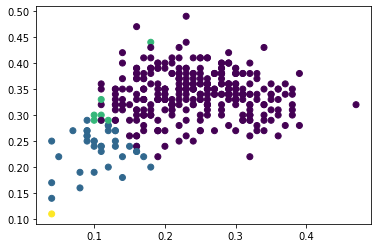

[3 1 2 1 0 2 2 1 0 0 3 2 0 3 3 1 3 2 3 3 3 1 3 1 3 0 0 1 3 1]
64.71005465888396
[[0.01352941 0.13352941 0.34294118 0.31078431 0.14509804 0.04745098
  0.00745098]
 [0.00232759 0.03448276 0.18017241 0.34465517 0.28155172 0.13327586
  0.02413793]
 [0.00285714 0.02714286 0.12017857 0.24714286 0.28535714 0.22571429
  0.09089286]
 [0.00419118 0.06360294 0.26816176 0.35691176 0.21191176 0.08073529
  0.01323529]]
四种难度平均尝试次数为： [3.6149019607843136, 4.366810344827586, 4.823571428571428, 4.000147058823529]
2.0418228399980682
0.26269293054077353


/home1/qsyao/snow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


In [40]:


k_means = KMeans(n_clusters=4, random_state=10)

k_means.fit(X)

y_predict = k_means.predict(X)

plt.scatter(X[:,2],X[:,3],c=y_predict)
plt.show()
print(k_means.predict((X[:30,:])))
print(metrics.calinski_harabaz_score(X,y_predict))# Calinski-Harbasz Score 是通过评估 类之间方差 和 类内方差 来计算得分，值越大效果越好。
print(k_means.cluster_centers_)
weighted_average=[]
for i in range(len(k_means.cluster_centers_)):
    temp=0
    for j in range(len(k_means.cluster_centers_[0])):
        temp+=(j+1)*k_means.cluster_centers_[i][j]
    weighted_average.append(temp)
print('四种难度平均尝试次数为：', weighted_average)
print(k_means.inertia_) #inertia指标，越小越好
print(metrics.silhouette_score(X,y_predict))#轮廓系数silhouette_score，【-1，1】，越接近1越好




[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


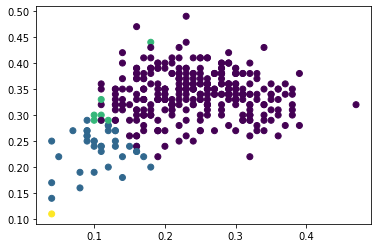

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
64.71005465888396
[[0.00341346 0.05336538 0.23894231 0.35475962 0.23538462 0.09653846
  0.01610577]
 [0.002      0.01       0.058      0.176      0.29       0.326
  0.134     ]
 [0.01       0.02       0.18       0.44       0.26       0.26
  0.09      ]
 [0.         0.         0.04       0.11       0.15       0.22
  0.48      ]]
四种难度平均尝试次数为： [4.114903846153846, 5.244000000000001, 5.840000000000001, 5.99]
0.26269293054077353


/home1/qsyao/snow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


In [43]:
clf = MeanShift()
clf.fit(X)
y_predict = clf.predict(X)
print(y_predict)
plt.scatter(X[:,2],X[:,3],c=y_predict)
plt.show()
print(clf.predict((X[:30,:])))
print(metrics.calinski_harabaz_score(X,y_predict))# Calinski-Harbasz Score 是通过评估 类之间方差 和 类内方差 来计算得分，值越大效果越好。
print(clf.cluster_centers_)
weighted_average=[]
for i in range(len(clf.cluster_centers_)):
    temp=0
    for j in range(len(clf.cluster_centers_[0])):
        temp+=(j+1)*clf.cluster_centers_[i][j]
    weighted_average.append(temp)
print('四种难度平均尝试次数为：', weighted_average)
# print(clf.inertia_) #inertia指标，越小越好
print(metrics.silhouette_score(X,y_predict))#轮廓系数silhouette_score，【-1，1】，越接近1越好



In [34]:
print(y_predict)

[3 1 2 1 0 2 2 1 0 0 3 2 0 3 3 1 3 2 3 3 3 1 3 1 3 0 0 1 3 1 1 2 1 1 3 1 3
 3 3 3 1 2 2 2 1 3 0 2 1 2 3 0 3 1 3 3 1 3 0 3 1 3 3 2 3 3 1 0 2 1 3 1 1 0
 1 1 0 3 1 1 2 1 2 2 1 0 2 1 1 1 1 3 0 0 1 3 3 3 3 1 1 3 2 1 2 0 3 3 2 0 3
 2 0 2 2 3 3 0 2 1 3 2 0 1 3 1 3 3 1 1 1 0 1 2 3 3 3 3 2 3 0 3 1 3 3 1 1 0
 1 3 1 1 3 3 3 2 0 3 0 1 3 3 2 3 3 1 1 3 3 1 0 3 1 2 2 3 1 1 2 3 2 1 3 1 3
 1 3 3 2 1 1 1 1 3 2 3 3 1 1 1 2 1 3 3 1 3 1 2 1 3 2 0 1 3 1 1 3 1 2 1 1 1
 3 3 1 0 1 3 1 1 3 3 1 2 3 3 2 1 0 2 3 1 2 1 1 3 1 1 2 1 3 0 2 0 0 2 1 3 0
 3 0 3 3 1 1 3 3 1 3 3 1 3 0 2 1 1 2 3 2 3 3 2 3 0 3 3 3 1 3 2 3 1 3 1 3 1
 2 3 1 3 0 3 0 0 3 3 0 0 3 3 3 3 1 2 0 3 3 2 1 3 0 3 3 0 3 0 1 3 1 3 3 0 2
 1 3 1 0 1 3 3 3 1 3 3 0 3 0 0 3 1 3 0 1 2 1 1 1 1 1]


In [36]:
word_level=[[],[],[],[]]
level_dict={}
for i in range(len(y_predict)): 
    if(y_predict[i]==1):
        y_predict[i]=3
    if(y_predict[i]==2):
        y_predict[i]=4
    if(y_predict[i]==0):
        y_predict[i]=1
    if(y_predict[i]==3):
        y_predict[i]=2    
    word_level[y_predict[i]-1].append(id2word[i])
    level_dict[id2word[i]]=y_predict[i]
print(level_dict)
words=list(reversed(data_frame.loc[ 1: ,"Unnamed: 3"].tolist()))
for word in words:
    print(level_dict[word])


{'slump': 4, 'crank': 4, 'gorge': 4, 'query': 2, 'drink': 1, 'favor ': 4, 'abbey': 4, 'tangy': 2, 'panic': 1, 'solar': 1, 'shire': 2, 'proxy': 4, 'point': 1, 'robot': 2, 'prick': 2, 'wince': 2, 'crimp': 2, 'knoll': 4, 'sugar': 2, 'whack': 2, 'mount': 2, 'perky': 2, 'could': 2, 'wrung': 2, 'light': 2, 'those': 1, 'moist': 1, 'shard': 2, 'pleat': 2, 'aloft': 2, 'skill': 2, 'elder': 4, 'frame': 2, 'humor': 2, 'pause': 2, 'ulcer': 2, 'ultra': 2, 'robin': 2, 'cynic': 2, 'aroma': 2, 'caulk': 2, 'shake': 4, 'dodge': 4, 'swill': 4, 'tacit': 2, 'other': 2, 'thorn': 1, 'trove': 4, 'bloke': 2, 'vivid': 4, 'spill': 2, 'chant': 1, 'choke': 2, 'rupee': 2, 'nasty': 2, 'mourn': 2, 'ahead': 2, 'brine': 2, 'cloth': 1, 'hoard': 2, 'sweet': 2, 'month': 2, 'lapse': 2, 'watch': 4, 'today': 2, 'focus': 2, 'smelt': 2, 'tease': 1, 'cater': 4, 'movie': 2, 'saute': 2, 'allow': 2, 'renew': 2, 'their': 1, 'slosh': 2, 'purge': 2, 'chest': 1, 'depot': 2, 'epoxy': 2, 'nymph': 2, 'found': 4, 'shall': 2, 'stove': 4, 'l

In [8]:
eeire=np.array([[1.2402e-05, 2.0842e-02, 1.4167e-01, 2.9303e-01, 3.5720e-01, 1.6357e-01,
         2.3675e-02]])
y_predict = k_means.predict(eeire)
print(y_predict)


[1]


In [7]:
woolf=np.array([[1.5550e-04, 1.3645e-02, 1.4414e-01, 3.6896e-01, 3.3231e-01, 1.2337e-01,
         1.7428e-02]])
y_predict = k_means.predict(eeire)
print(y_predict)


[1]


In [29]:
ooouu=np.array([[9.1743e-08, 2.2802e-03, 6.8188e-02, 3.1271e-01, 4.8745e-01, 1.2829e-01,
         1.0834e-03]])
y_predict = k_means.predict(eeire)
print(y_predict)



[1]
